In [4]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import the dataset
df = pd.read_csv("mental_health_remote_workers.csv")
print(df.head())

   Employee_ID    Name  Age             Gender    Country         Job_Role  \
0            1  User_1   28             Female     Canada      QA Engineer   
1            2  User_2   41  Prefer not to say  Australia  DevOps Engineer   
2            3  User_3   36               Male    Germany   UI/UX Designer   
3            4  User_4   32  Prefer not to say    Germany  Product Manager   
4            5  User_5   29               Male         UK  DevOps Engineer   

   Experience_Years Work_Mode  Hours_Worked_Per_Week  Productivity_Score  \
0               5.4    Onsite                   45.4                 6.6   
1              10.5    Remote                   40.4                 8.4   
2              11.9    Hybrid                   43.6                 6.6   
3              15.6    Hybrid                   41.3                 9.0   
4               1.8    Hybrid                   42.5                 6.9   

  Mental_Health_Status  Burnout_Score  Sleep_Hours_Per_Day Exercise_Freque

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Employee_ID                       100 non-null    int64  
 1   Name                              100 non-null    object 
 2   Age                               100 non-null    int64  
 3   Gender                            100 non-null    object 
 4   Country                           100 non-null    object 
 5   Job_Role                          100 non-null    object 
 6   Experience_Years                  100 non-null    float64
 7   Work_Mode                         100 non-null    object 
 8   Hours_Worked_Per_Week             100 non-null    float64
 9   Productivity_Score                100 non-null    float64
 10  Mental_Health_Status              100 non-null    object 
 11  Burnout_Score                     100 non-null    int64  
 12  Sleep_Hou

There are no null values.

categorical variables - Gender, Country, Job_Role, Work_mode, Mental_Health_Status, Exercise_Frequency,
Has_Access_To_Therapist, Willing_To_Return_Onsite, Internet_Isuues_frequency

numerical variables - Age, Experience_Years, Hours_Worked_Per_Week, Productivity_Score, Burnout_Score, Sleep_Hours_Per_Day,
Work_Life_Balance_Rating, Remote_Setup_Satisfaction, Team_Communication_Effectiveness

1) Analysing categorical variables:

1) a. Univariate analysis

['Female' 'Prefer not to say' 'Male' 'Non-binary']


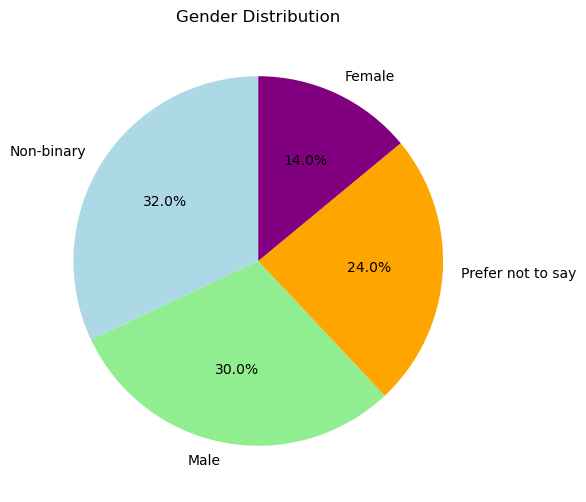

In [7]:
#Gender
print(df['Gender'].unique())
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen','orange','purple']
)
plt.title('Gender Distribution')
plt.show()

Highest percentage of workers used the option 'Non-binary' for gender and it is 32%. 30% of the workers are male. 24% of the workers used the option 'Prefer not to say'. Lowest percentage of workers are females and it is 14%.

['Canada' 'Australia' 'Germany' 'UK' 'Brazil' 'India' 'USA']


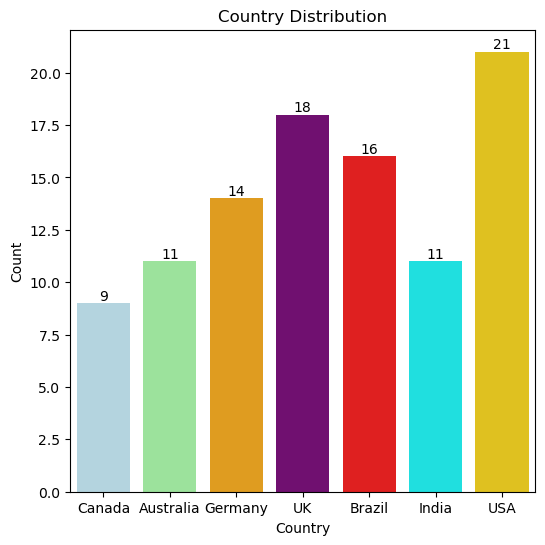

In [8]:
#Country
print(df['Country'].unique())
country_counts = df['Country'].value_counts()
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Country', hue='Country', data=df, palette=['lightblue', 'lightgreen', 'orange', 'purple', 'red', 'cyan', 'gold'], legend=False)
for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(
        count,
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom'
    )
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Highest number of workers from USA. Lowest number of workers from Canada. Equal number of workers from Australia and India. From Germany there are 14 workers and  from Brazil there are 16 workers.

['QA Engineer' 'DevOps Engineer' 'UI/UX Designer' 'Product Manager'
 'Data Scientist' 'Developer']


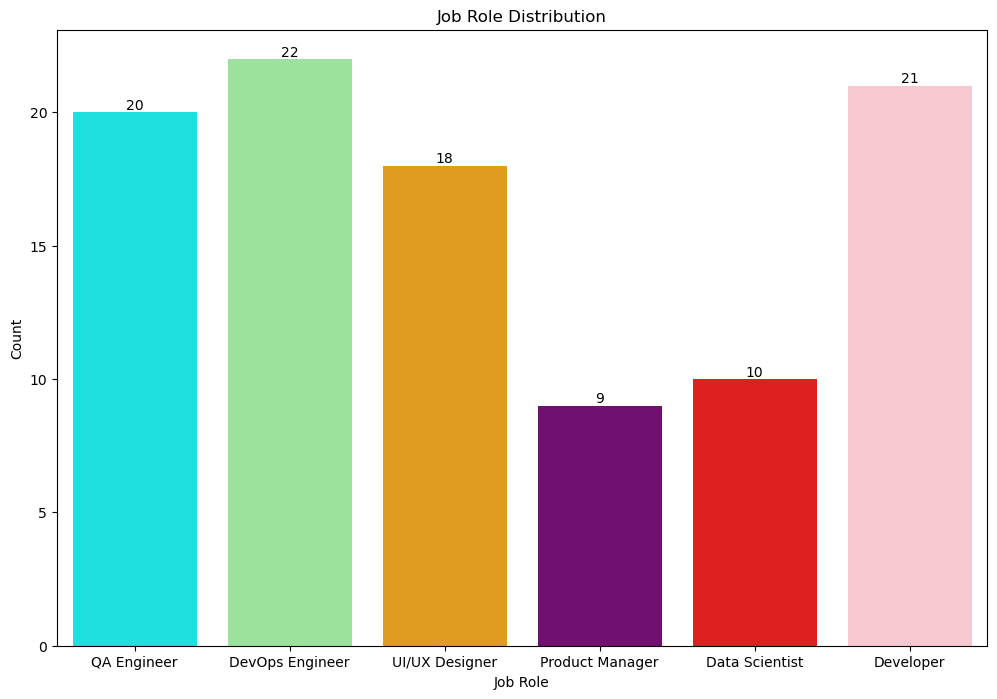

In [9]:
#Job_Role
print(df['Job_Role'].unique())
job_role_counts = df['Job_Role'].value_counts()
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Job_Role',hue='Job_Role', data=df, palette=['cyan', 'lightgreen', 'orange', 'purple', 'red', 'pink'], legend=False)
for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(
        count,
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom'
    )
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

Highest number of workers are DevOps Engineers. Lowest number of workers are Product Managers. Number of QA Engineers, UI/UX Designers, Data Scientists, and Developers are 20, 18, 10, and 21 respectively.

['Onsite' 'Remote' 'Hybrid']


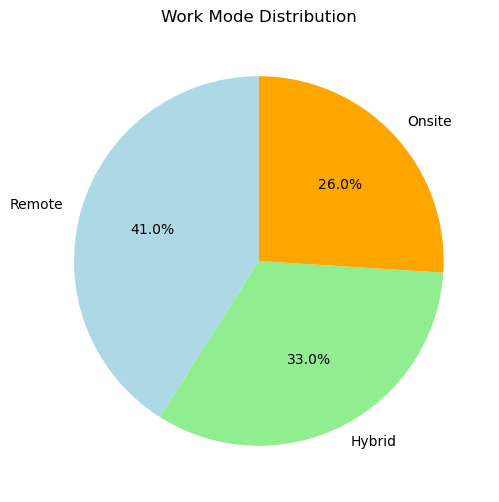

In [10]:
#Work_Mode
print(df['Work_Mode'].unique())
work_mode_counts = df['Work_Mode'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    work_mode_counts,
    labels=work_mode_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen','orange']
)
plt.title('Work Mode Distribution')
plt.show()

Highest number of workers work remotely and it is 41%. Lowest number of workers work onsite and it is 26%. 33% of the workers work as hybrid.

['Poor' 'Good' 'Moderate']


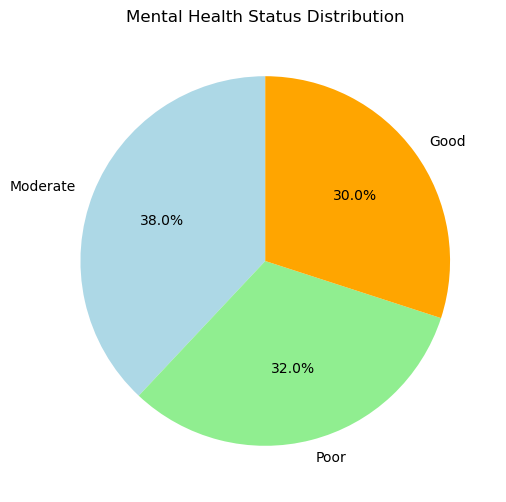

In [11]:
#Mental_Health_Status column
print(df['Mental_Health_Status'].unique())
mental_health_status_counts = df['Mental_Health_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    mental_health_status_counts,
    labels=mental_health_status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen','orange']
)
plt.title('Mental Health Status Distribution')
plt.show()

Highest percentage of workers mental health is moderate and it is 38%. Loweat percentage of workers mental health is good and it is 30%. 32% of the workers mental health is poor.

Mental health status will be used as the class beacuse all three categories have approximately equal percentages; implying class is balanced.

['Rarely' 'Daily' 'Never' '2-3x/Week']


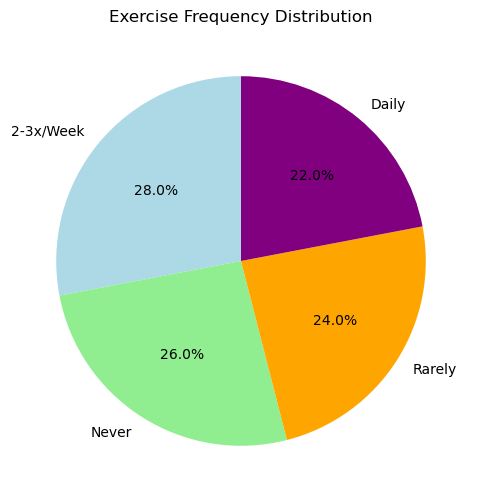

In [12]:
#Exercise_Frequency column
print(df['Exercise_Frequency'].unique())
exercise_frequency_counts = df['Exercise_Frequency'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    exercise_frequency_counts,
    labels=exercise_frequency_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen','orange', 'purple']
)
plt.title('Exercise Frequency Distribution')
plt.show()

Highest percenatage of workers exercise 2-3 times a week and it is 28%. Lowest percentage of workers exercise daily and it is 22%. 24% of the workers exercise rarely and 26% of the workers have nerver exercised.

[ True False]


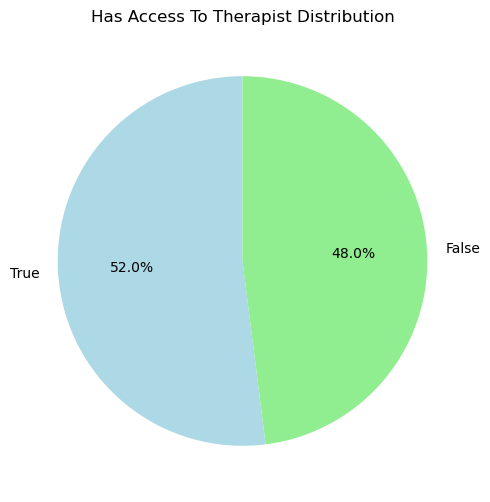

In [13]:
#Has_Access_To_Therapist column
print(df['Has_Access_To_Therapist'].unique())
has_access_to_therapist_counts = df['Has_Access_To_Therapist'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    has_access_to_therapist_counts,
    labels=has_access_to_therapist_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen']
)
plt.title('Has Access To Therapist Distribution')
plt.savefig("charts/categorical_variables/univariate_analysis/has_access_to_therapist.png")
plt.show()

52% has access to therapist and 48% has not.

[False  True]


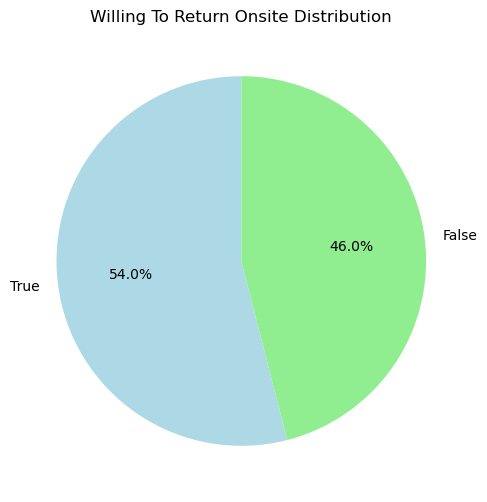

In [14]:
#Willing_To_Return_Onsite column
print(df['Willing_To_Return_Onsite'].unique())
willing_to_return_onsite_counts = df['Willing_To_Return_Onsite'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    willing_to_return_onsite_counts,
    labels=willing_to_return_onsite_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen']
)
plt.title('Willing To Return Onsite Distribution')
plt.savefig("charts/categorical_variables/univariate_analysis/willing_to_return_onsite.png")
plt.show()

54% of the workers are willing to return to onsite and 46% won't.

['Sometimes' 'Often' 'Never']


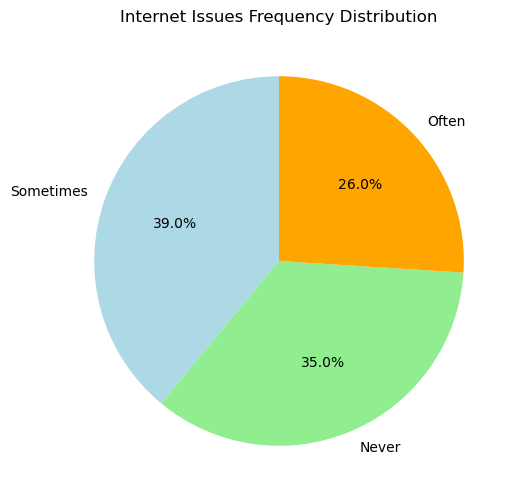

In [15]:
#Internet_Issues_Frequency column
print(df['Internet_Issues_Frequency'].unique())
internet_issues_frequency_counts = df['Internet_Issues_Frequency'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    internet_issues_frequency_counts,
    labels=internet_issues_frequency_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightgreen', 'orange']
)
plt.title('Internet Issues Frequency Distribution')
plt.savefig("charts/categorical_variables/univariate_analysis/internet_issues_frequency.png")
plt.show()

Highest number of workers have internet issues sometimes and it is 39%. Lowest number of workers have internet issues often and it is 26%. 35% of the worksers have never got internet issues.

b. Bivariate analysis

In [16]:
#Gender vs. work mode
counts = pd.crosstab(df['Gender'], df['Work_Mode'])
row_pct = pd.crosstab(df['Gender'], df['Work_Mode'], normalize='index')*100
row_pct = row_pct.round(2)
combined = counts.astype(str) + " (" + row_pct.astype(str) + "%)"
print(combined)

Work_Mode               Hybrid      Onsite       Remote
Gender                                                 
Female              2 (14.29%)  8 (57.14%)   4 (28.57%)
Male               14 (46.67%)  8 (26.67%)   8 (26.67%)
Non-binary         11 (34.38%)  6 (18.75%)  15 (46.88%)
Prefer not to say    6 (25.0%)  4 (16.67%)  14 (58.33%)


Most of the females work onsite. Most of the males work hybrid. Most of the non-binary work remotely. Most of the 'Prefer not to say' work remotely.

In [17]:
#Work mode vs. mental health status
counts = pd.crosstab(df['Work_Mode'], df['Mental_Health_Status'])
row_pct = pd.crosstab(df['Work_Mode'], df['Mental_Health_Status'], normalize='index')*100
row_pct = row_pct.round(2)
combined = counts.astype(str) + " (" + row_pct.astype(str) + "%)"
print(combined)

Mental_Health_Status         Good     Moderate         Poor
Work_Mode                                                  
Hybrid                 10 (30.3%)  13 (39.39%)   10 (30.3%)
Onsite                 9 (34.62%)  10 (38.46%)   7 (26.92%)
Remote                11 (26.83%)  15 (36.59%)  15 (36.59%)


In [18]:
#work mode vs. exercise frequency
counts = pd.crosstab(df['Work_Mode'], df['Exercise_Frequency'])
row_pct = pd.crosstab(df['Work_Mode'], df['Exercise_Frequency'], normalize='index')*100
row_pct = row_pct.round(2)
combined = counts.astype(str) + " (" + row_pct.astype(str) + "%)"
print(combined)

Exercise_Frequency    2-3x/Week       Daily        Never       Rarely
Work_Mode                                                            
Hybrid               5 (15.15%)  7 (21.21%)  13 (39.39%)   8 (24.24%)
Onsite               9 (34.62%)  6 (23.08%)   6 (23.08%)   5 (19.23%)
Remote              14 (34.15%)  9 (21.95%)   7 (17.07%)  11 (26.83%)


Most of the hybrid and onsite workers'mental health status is moderate. Most of the remote workers' mental health status is either moderate or poor.

In [19]:
#work mode vs. access to therapist
counts = pd.crosstab(df['Work_Mode'], df['Has_Access_To_Therapist'])
row_pct = pd.crosstab(df['Work_Mode'], df['Has_Access_To_Therapist'], normalize='index')*100
row_pct = row_pct.round(2)
combined = counts.astype(str) + " (" + row_pct.astype(str) + "%)"
print(combined)

Has_Access_To_Therapist        False        True 
Work_Mode                                        
Hybrid                   16 (48.48%)  17 (51.52%)
Onsite                   11 (42.31%)  15 (57.69%)
Remote                   21 (51.22%)  20 (48.78%)


Most of the hybrid and onsite workers have access to therapist and most remote wokers don't have access to therapist.

In [20]:
#work mode vs. internet issues
counts = pd.crosstab(df['Work_Mode'], df['Internet_Issues_Frequency'])
row_pct = pd.crosstab(df['Work_Mode'], df['Internet_Issues_Frequency'], normalize='index')*100
row_pct = row_pct.round(2)
combined = counts.astype(str) + " (" + row_pct.astype(str) + "%)"
print(combined)

Internet_Issues_Frequency        Never       Often    Sometimes
Work_Mode                                                      
Hybrid                     11 (33.33%)  10 (30.3%)  12 (36.36%)
Onsite                     10 (38.46%)  8 (30.77%)   8 (30.77%)
Remote                     14 (34.15%)  8 (19.51%)  19 (46.34%)


Most of the hybrid and remote workers have internet issues sometimes. Most od the onsite workers don't have internet issues.

2) Analysing numerical variables

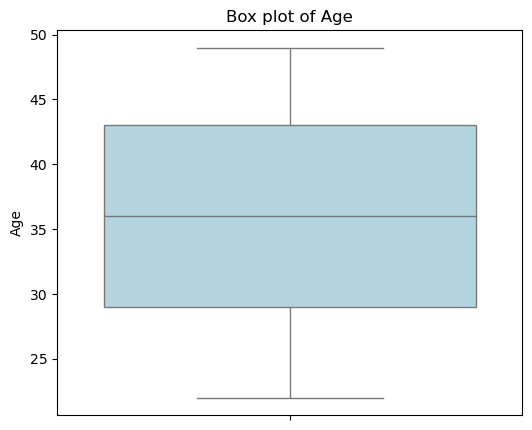

Minimum : 22
Maximum : 49


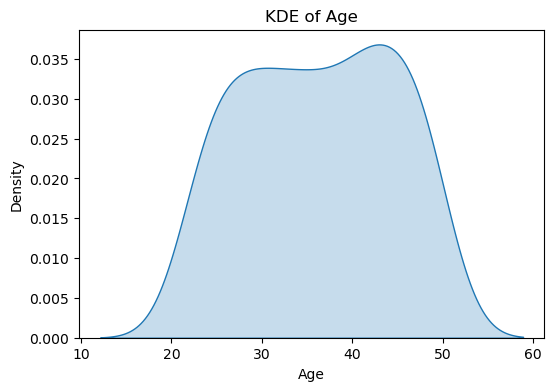

Skewness : -0.060


In [21]:
#Age
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Age'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Age")
plt.ylabel('Age')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_age")
plt.show()

min = df['Age'].min()
max = df['Age'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Age', fill=True)
plt.title('KDE of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_age")
plt.show()

skewness = df['Age'].skew()
print(f"Skewness : {skewness:.3f}")

There are no outliers in Age.
There are two modes.
Distribution of Age is negatively skewed.

In [22]:
median = df['Age'].median()
print(f"Median : {median}")

Median : 36.0


Half of the workers' age is above 36.

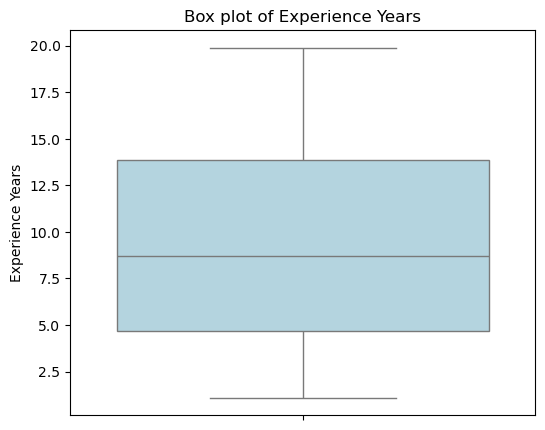

Minimum : 1.1
Maximum : 19.9


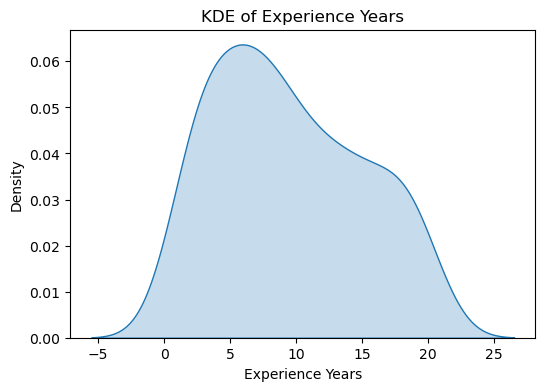

Skewness : 0.334


In [23]:
#Experience_Years
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Experience_Years'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Experience Years")
plt.ylabel('Experience Years')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_experience_years")
plt.show()

min = df['Experience_Years'].min()
max = df['Experience_Years'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Experience_Years', fill=True)
plt.title('KDE of Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_experience_years")
plt.show()

skewness = df['Experience_Years'].skew()
print(f"Skewness : {skewness:.3f}")

There are no outliers in Experience Years.
Distribution of Experience Years is positively skewed.
There are 2 modes.

In [24]:
median = df['Experience_Years'].median()
print(f"Median : {median}")

Median : 8.7


Half of the workers experience years is more than 8.7 years.

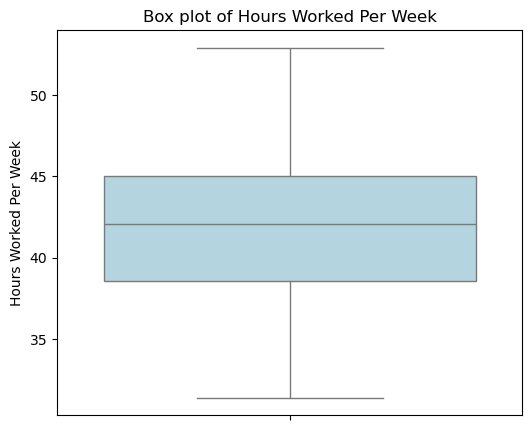

Minimum : 31.4
Maximum : 52.9


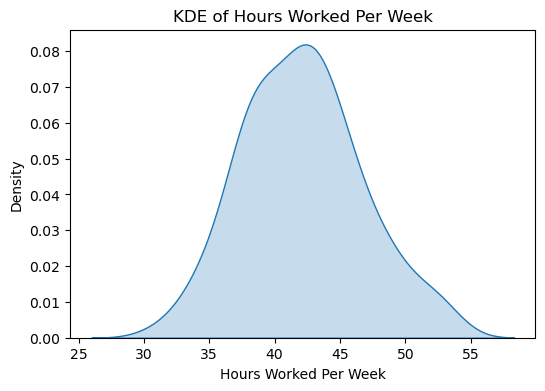

Skewness = 0.257


In [25]:
#Hours_Worked_Per_Week
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Hours_Worked_Per_Week'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Hours Worked Per Week")
plt.ylabel('Hours Worked Per Week')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_hours_worked_per_week")
plt.show()

min = df['Hours_Worked_Per_Week'].min()
max = df['Hours_Worked_Per_Week'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Hours_Worked_Per_Week', fill=True)
plt.title('KDE of Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_hours_worked_per_week")
plt.show()

skewness = df['Hours_Worked_Per_Week'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers in Hours Worked Per Week.
Distribution of Hours Worked Per Week is positively skewed.

In [26]:
median = df['Hours_Worked_Per_Week'].median()
print(f"Median : {median}")

Median : 42.05


Half of the workers work more than 42.05 hours per week.

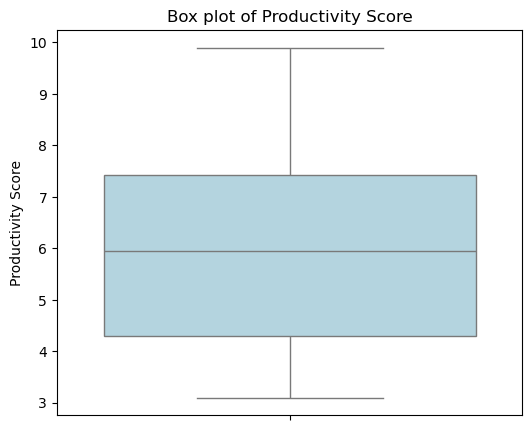

Minimum : 3.1
Maximum : 9.9


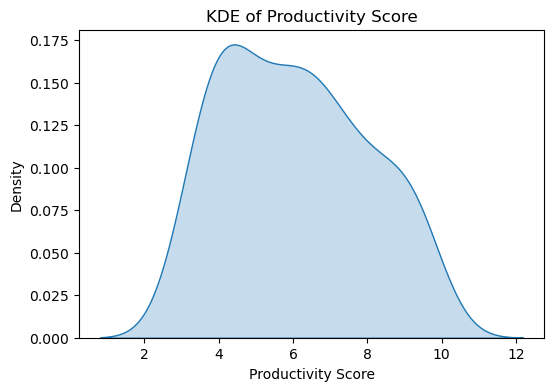

Skewness = 0.270


In [27]:
#Productivity_Score
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Productivity_Score'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Productivity Score")
plt.ylabel('Productivity Score')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_productivity_score")
plt.show()

min = df['Productivity_Score'].min()
max = df['Productivity_Score'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Productivity_Score', fill=True)
plt.title('KDE of Productivity Score')
plt.xlabel('Productivity Score')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_productivity_score")
plt.show()

skewness = df['Productivity_Score'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers in Productivity Score.
Distribution of Productivity Score is positively skewed.
There are 3 modes.

In [28]:
median = df['Productivity_Score'].median()
print(f"Median : {median:.3f}")

Median : 5.950


Half of the workers' productivity score is more than 5.950.

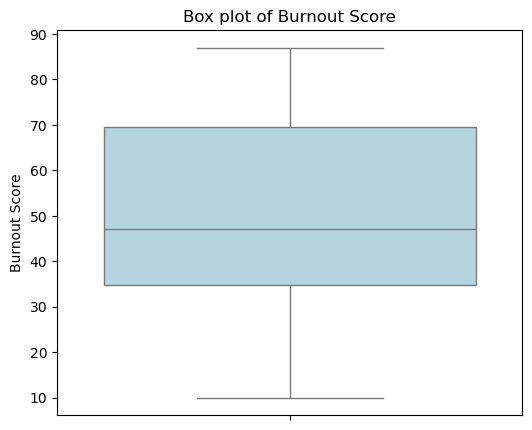

Minimum : 10
Maximum : 87


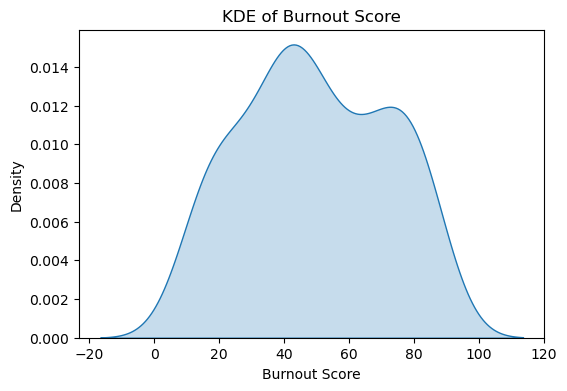

Skewness = 0.020


In [29]:
#Burnout_Score
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Burnout_Score'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Burnout Score")
plt.ylabel('Burnout Score')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_burnout_score")
plt.show()

min = df['Burnout_Score'].min()
max = df['Burnout_Score'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Burnout_Score', fill=True)
plt.title('KDE of Burnout Score')
plt.xlabel('Burnout Score')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_burnout_score")
plt.show()

skewness = df['Burnout_Score'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers Burnout Score.
Burnout Score has 2 modes.
Distribution of Burnout Score is positively skewed.

In [30]:
median = df['Burnout_Score'].median()
print(f"Median : {median}")

Median : 47.0


Half of the workers's Burnout Score is more than 47.

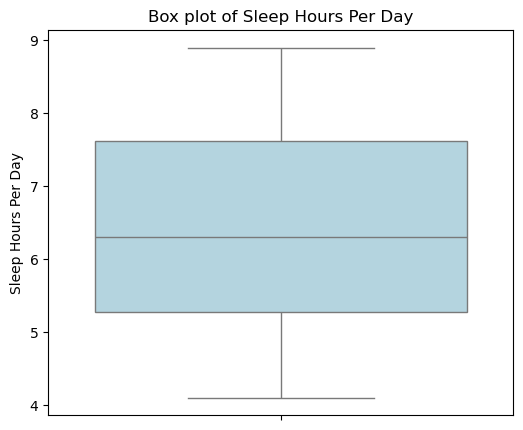

Minimum : 4.1
Maximum : 8.9


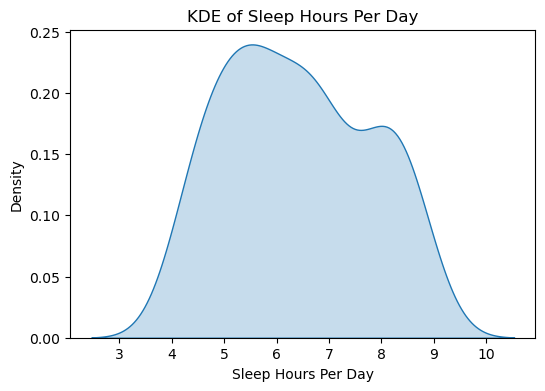

Skewness = 0.177


In [31]:
#Sleep_Hours_Per_Day
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Sleep_Hours_Per_Day'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Sleep Hours Per Day")
plt.ylabel('Sleep Hours Per Day')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_sleep_hours_per_day")
plt.show()

min = df['Sleep_Hours_Per_Day'].min()
max = df['Sleep_Hours_Per_Day'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Sleep_Hours_Per_Day', fill=True)
plt.title('KDE of Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_sleep_hours_per_day")
plt.show()

skewness = df['Sleep_Hours_Per_Day'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers in Sleep Hours Per Day.
Distribution of Sleep Hours Per Day is positivly skewed.
There are 2 modes.

In [32]:
median = df['Sleep_Hours_Per_Day'].median()
print(f"Median : {median}")

Median : 6.3


Half of the workers get more than 6.3 hours of sleep per day.

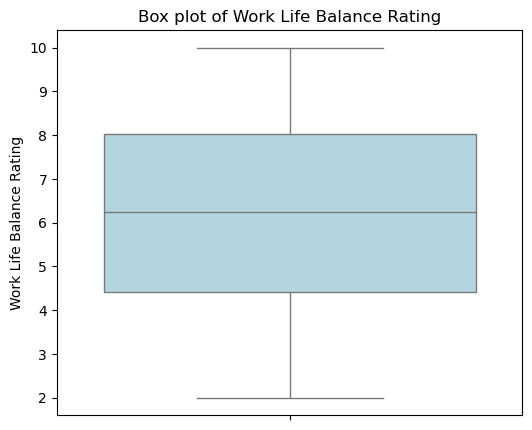

Minimum : 2.0
Maximum : 10.0


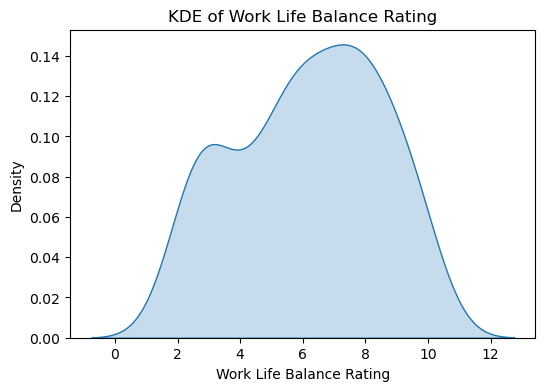

Skewness = -0.193


In [33]:
#Work_Life_Balance_Rating
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Work_Life_Balance_Rating'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Work Life Balance Rating")
plt.ylabel('Work Life Balance Rating')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_work_life_balance_rating")
plt.show()

min = df['Work_Life_Balance_Rating'].min()
max = df['Work_Life_Balance_Rating'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Work_Life_Balance_Rating', fill=True)
plt.title('KDE of Work Life Balance Rating')
plt.xlabel('Work Life Balance Rating')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_work_life_balance_rating")
plt.show()

skewness = df['Work_Life_Balance_Rating'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers.
Distribution of Work Life Balance Rating is negatively skewed.
There are 2 modes.

In [34]:
median = df['Work_Life_Balance_Rating'].median()
print(f"Median : {median}")

Median : 6.25


Half of the workers' work life balance rating is more than 6.25.

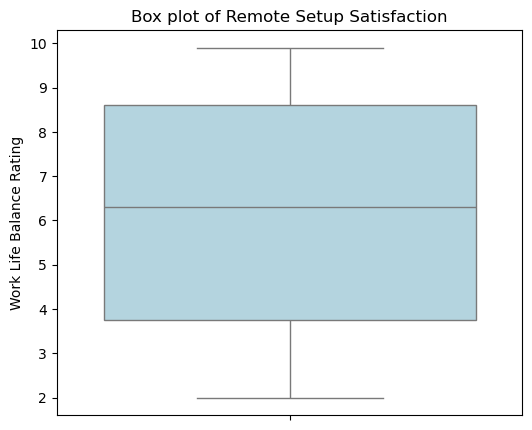

Minimum : 2.0
Maximum : 9.9


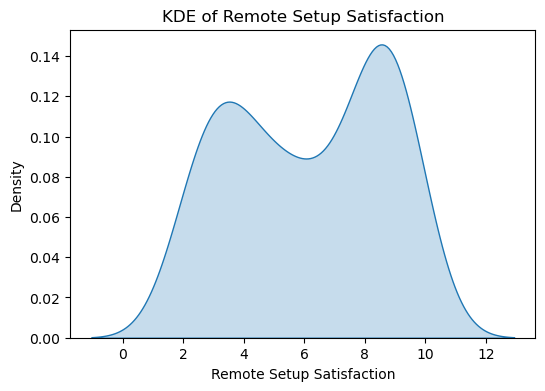

Skewness = -0.143


In [35]:
#Remote_Setup_Satisfaction
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Remote_Setup_Satisfaction'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Remote Setup Satisfaction")
plt.ylabel('Work Life Balance Rating')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_remote _setup_satisfaction")
plt.show()

min = df['Remote_Setup_Satisfaction'].min()
max = df['Remote_Setup_Satisfaction'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Remote_Setup_Satisfaction', fill=True)
plt.title('KDE of Remote Setup Satisfaction')
plt.xlabel('Remote Setup Satisfaction')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_remote _setup_satisfaction")
plt.show()

skewness = df['Remote_Setup_Satisfaction'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers in Setup satisfaction.
There are 2 modes.
Distribution of setup satisfaction is negatively skewed.

In [36]:
median = df['Remote_Setup_Satisfaction'].median()
print(f"Median : {median:.3f}")

Median : 6.300


Half of the workers remote setup satisaction is more than 6.3.

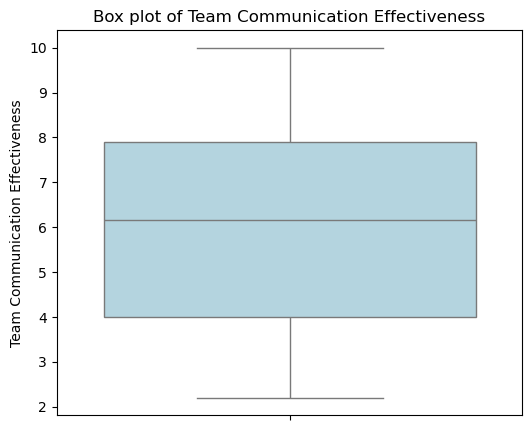

Minimum : 2.2
Maximum : 10.0


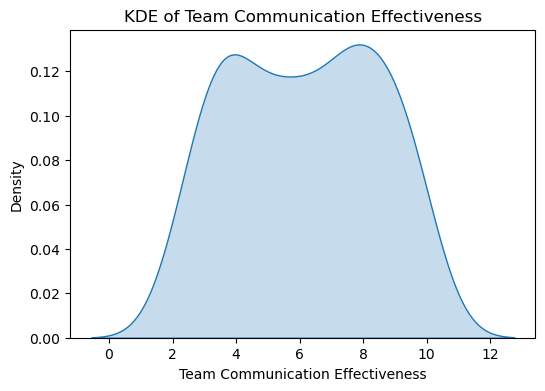

Skewness = -0.013


In [37]:
#Team_Communication_Effectiveness
plt.figure(figsize=(6,5))
sns.boxplot(
    y=df['Team_Communication_Effectiveness'],
    color='lightblue',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=8,
        linestyle='none'
    ))
plt.title("Box plot of Team Communication Effectiveness")
plt.ylabel('Team Communication Effectiveness')
plt.savefig("charts/numerical_variables/univariate_analysis/box_plot_of_team_communication_effectiveness")
plt.show()

min = df['Team_Communication_Effectiveness'].min()
max = df['Team_Communication_Effectiveness'].max()
print(f"Minimum : {min}")
print(f"Maximum : {max}")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Team_Communication_Effectiveness', fill=True)
plt.title('KDE of Team Communication Effectiveness')
plt.xlabel('Team Communication Effectiveness')
plt.ylabel('Density')
plt.savefig("charts/numerical_variables/univariate_analysis/kde_of_team_communication_effectiveness")
plt.show()

skewness = df['Team_Communication_Effectiveness'].skew()
print(f"Skewness = {skewness:.3f}")

There are no outliers in team communication effectivenss.
There are 2 modes.
Distribution of team communication effectivenss is negatively skewed.

In [38]:
median = df['Team_Communication_Effectiveness'].median()
print(f"Median : {median:.3f}")

Median : 6.150


Half of the workers team communication effectiveness is more than 6.150.

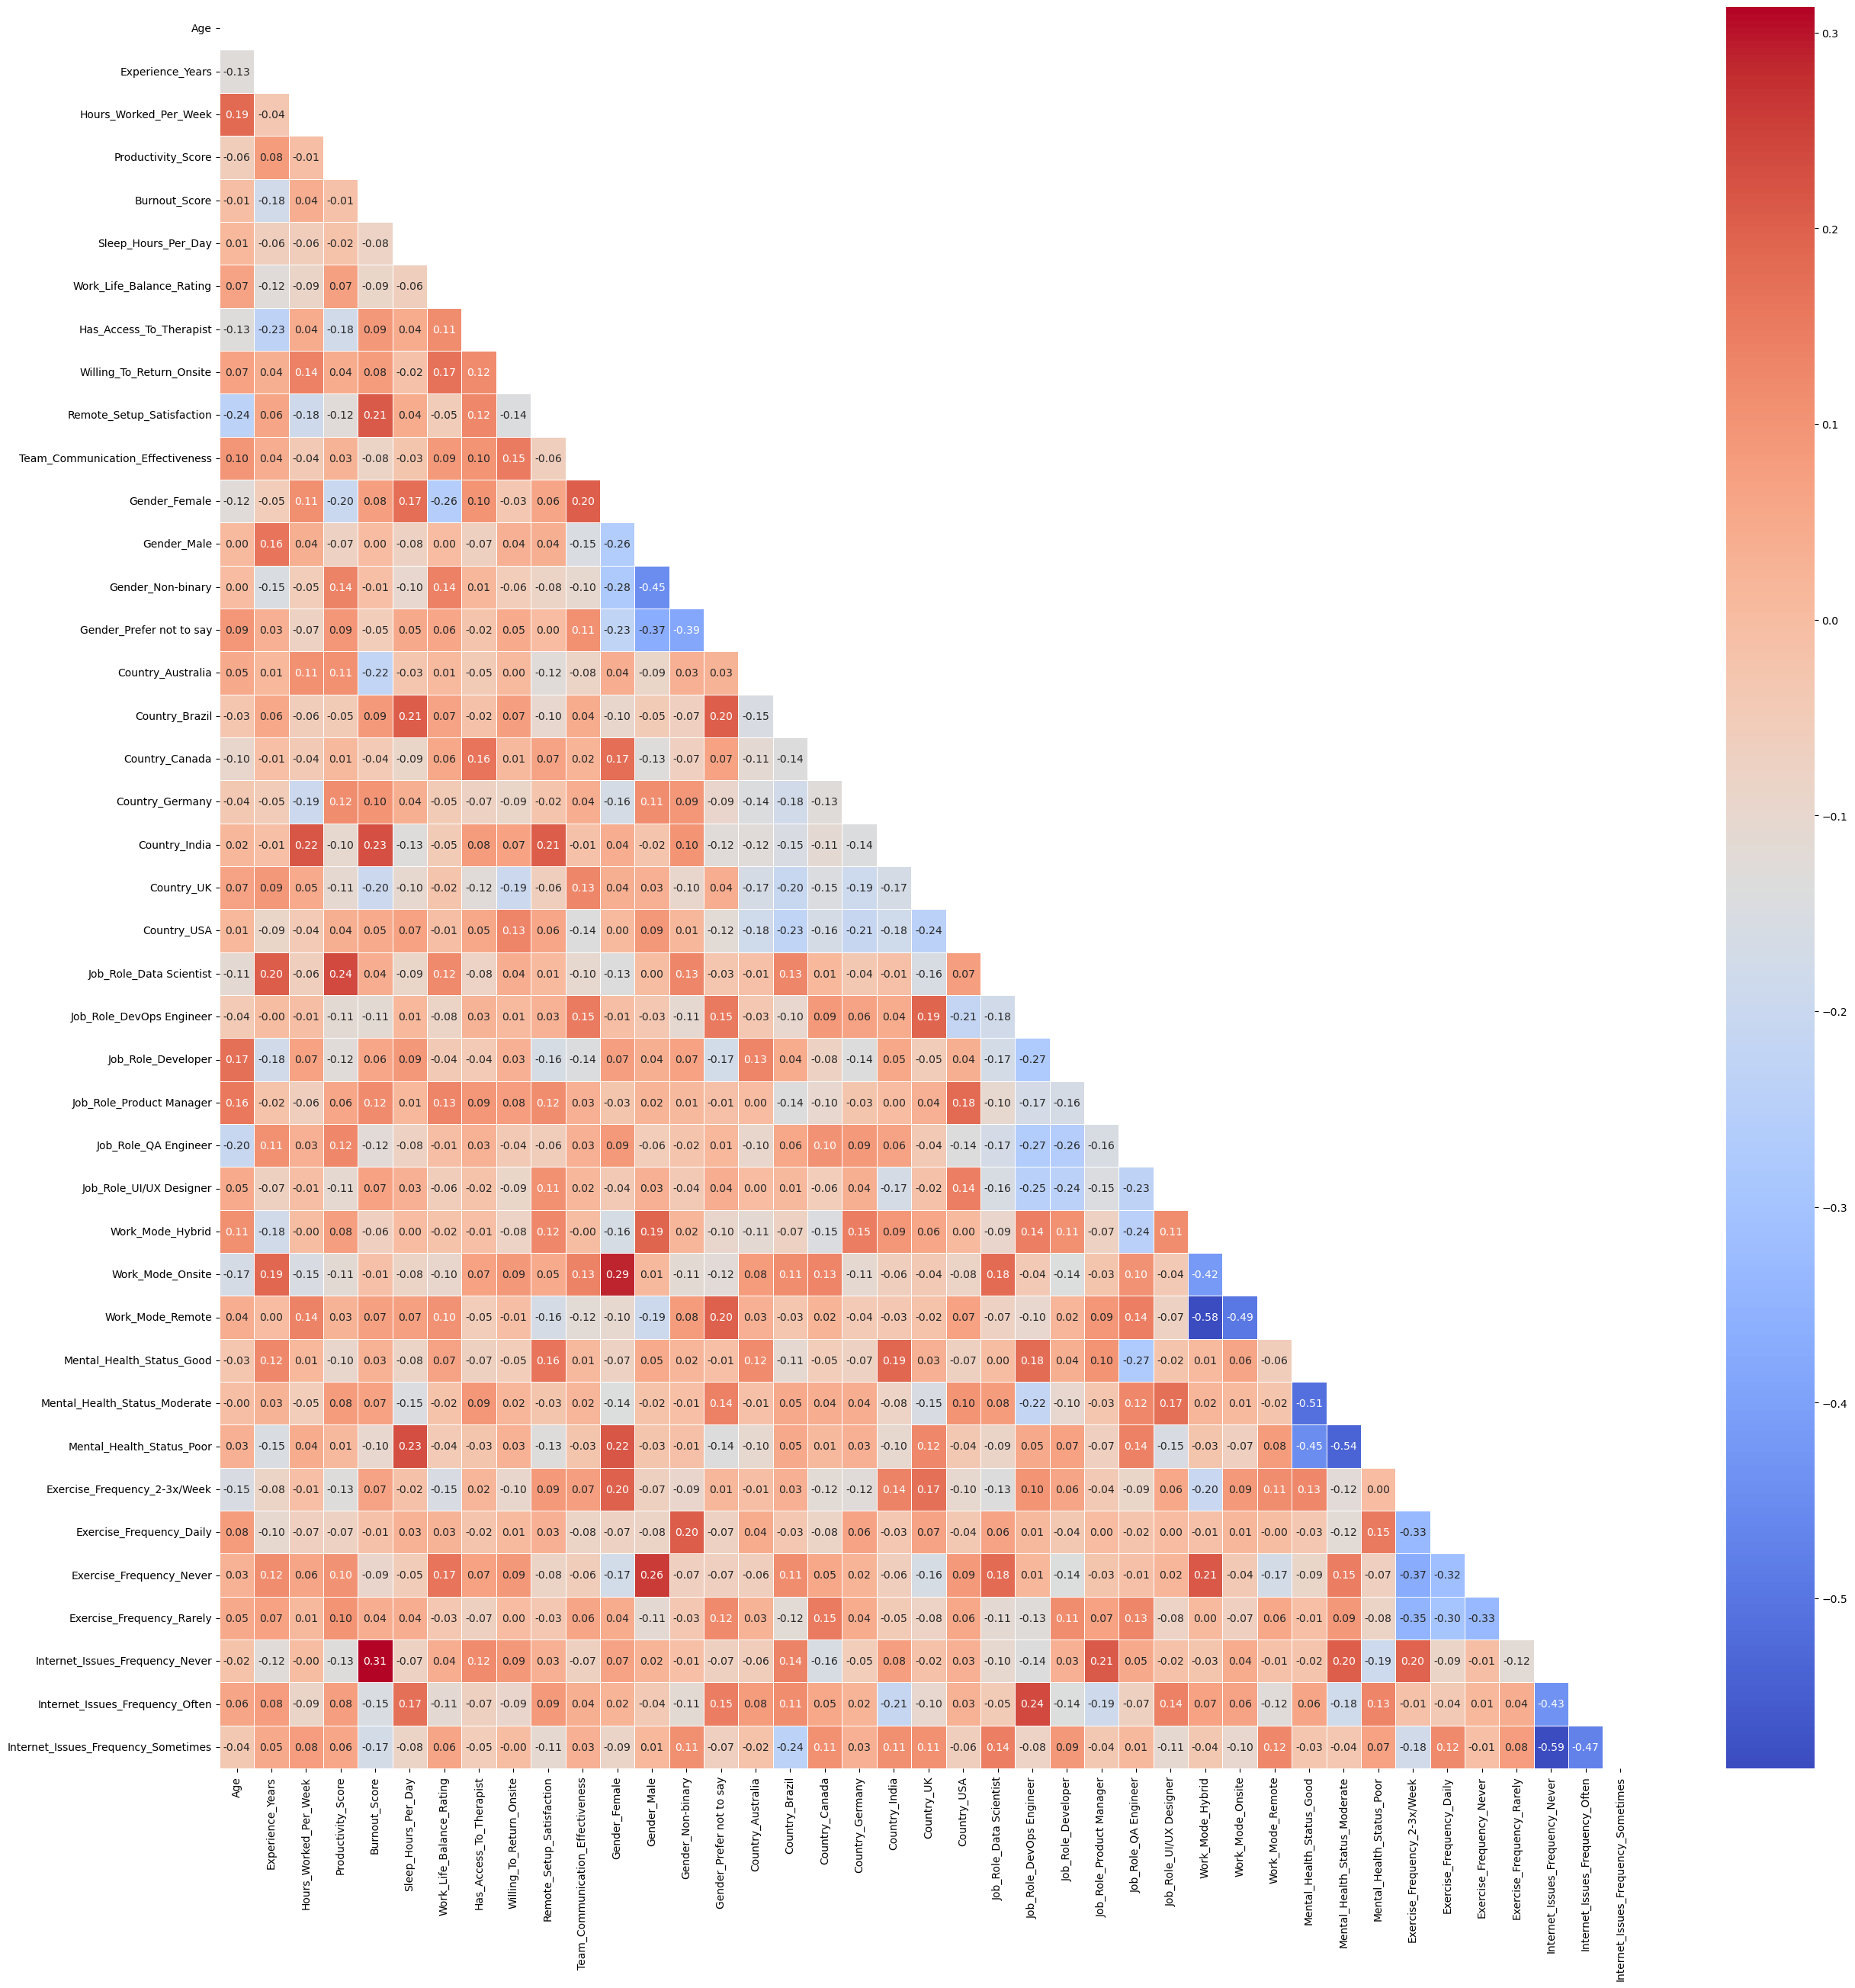

In [39]:
df_cleaned = pd.read_csv("../cleaned_dataset/encoded_dataset.csv")
corr_matrix = df_cleaned.corr().round(3)
plt.figure(figsize=(30, 30))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.savefig("../cleaned_dataset/correlation_heatmap.png")

with open("../cleaned_dataset/correlation_matrix.txt", "w") as f:
    f.write("Correlation Matrix\n")
    f.write("=" * 60 + "\n\n")
    f.write(corr_matrix.round(3).to_string())


In [49]:
mental_cols = [
    'Mental_Health_Status_Poor',
    'Mental_Health_Status_Moderate',
    'Mental_Health_Status_Good'
]
mental_corr = corr_matrix[mental_cols].drop(index=mental_cols)
output_file = "../cleaned_dataset/mental_health_pos_neg_correlations.txt"

with open(output_file, "w") as f:
    f.write("Mental Health Status: Positive and Negative Correlations\n")
    f.write("=" * 80 + "\n\n")

    for col in mental_cols:
        f.write(f"{col}\n")
        f.write("-" * len(col) + "\n")

        positive = mental_corr[col][mental_corr[col] > 0].sort_values(ascending=False)
        negative = mental_corr[col][mental_corr[col] < 0].sort_values()

        # Positive correlations
        f.write("Positive correlations:\n")
        if positive.empty:
            f.write("  None\n")
        else:
            for var, value in positive.items():
                f.write(f"  {var} : +{value:.3f}\n")

        # Negative correlations
        f.write("\nNegative correlations:\n")
        if negative.empty:
            f.write("  None\n")
        else:
            for var, value in negative.items():
                f.write(f"  {var} : {value:.3f}\n")

        f.write("\n\n")


In [119]:
import os
print(os.getcwd())

c:\Users\amash\Desktop\Projects\Mental-health-of-remote-tech-workers\data\raw_dataset
